<a href="https://colab.research.google.com/github/patrickhamzaokello/ColabFavourites/blob/main/MW_Recommender_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
!pip install mysql-connector-python

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import requests
import io
import json
import mysql.connector

import datetime

In [124]:
from google.colab import userdata

def get_db_cursor():
  db = mysql.connector.connect(
          host=userdata.get('mwonyaDBHost'),
          user=userdata.get('mwonyaDBUser'),
          password=userdata.get('mwonyaDBPassword'),
          database=userdata.get('mwonyaDB')
      )


  # create a new cursor instance
  cursor = db.cursor()

  return db, cursor

def close_db_connection(db, cursor):
  cursor.close()
  db.close()

In [125]:
def get_db_data(query: str):
    """Execute query and return results as a DataFrame"""
    db, cursor = get_db_cursor()
    try:
        cursor.execute(query)
        # Fetch column names
        columns = [col[0] for col in cursor.description]
        # Fetch all rows
        rows = cursor.fetchall()
        # Convert to DataFrame
        df = pd.DataFrame(rows, columns=columns)
    finally:
        close_db_connection(db, cursor)

    return df

In [126]:
song_frequency = get_db_data("select f.userid, f.songid, f.plays from frequency f join songs s on s.id=f.songid  where s.path <> '' and s.available=1")

In [127]:
song_frequency.head()

,userid,songid,plays
0,mw6362092bbf9b6Mk,373,1
1,mw6378a58bad504cap,582,1
2,mw6378a745a083fTri,616,1
3,mw6378bda37af59van,637,6
4,mw63c8f9c0461aaals,751,1


In [128]:
len(song_frequency)

17492

In [129]:
song_details = get_db_data("select s.id as songid, s.title, g.name as genre from songs s join genres g on g.id=s.genre where s.path <> '' and s.available=1 ")

In [130]:
song_details.head()

,songid,title,genre
0,74,00 Waidaba New Season Intro,Audio Dramas
1,75,01 Waidaba episode industry,Audio Dramas
2,76,02 Waidaba Episode Purpose,Audio Dramas
3,77,Peloke,Afro pop
4,78,One more night,Afro pop


In [131]:
len(song_details)

1936

In [132]:
n_frequency = len(song_frequency)
n_users = song_frequency['userid'].nunique()
n_songs = song_frequency['songid'].nunique()

In [133]:
print("play_frequency: " + str(n_frequency))
print("users: " + str(n_users))
print("songs: " + str(n_songs))
print("average frequency per user: " + str(round(n_frequency/n_users, 2)))
print("average frequency per song: " + str(round(n_frequency/n_songs, 2)))

play_frequency: 17492
users: 2318
songs: 1710
average frequency per user: 7.55
average frequency per song: 10.23


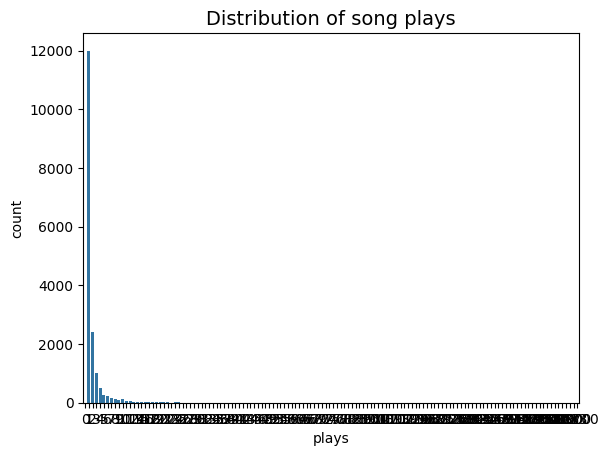

In [134]:
#distribution of play frequency
sns.countplot(x='plays', data=song_frequency)
plt.title("Distribution of song plays", fontsize=14)
plt.show()

In [135]:
print(f"mean global plays: {round(song_frequency['plays'].mean(), 2)}")

mean global plays: 7.43


In [136]:
mean_plays = song_frequency.groupby('userid')['plays'].mean()
print(f"mean plays per user: {round(mean_plays.mean(), 2)}")

mean plays per user: 2.33


Which songs are most frequently played

In [137]:
song_frequency['songid'].value_counts()

,count
songid,
1908,546
1917,513
1925,206
2068,166
659,152
...,...
2390,1
2378,1
2403,1


In [138]:
#Which songs are most frequently played )top 10)
song_plays = song_frequency.merge(song_details, on='songid')
song_plays['title'].value_counts()[0:10]

,count
title,
Voice of Lango 88.0 & 100.4,546
Unity 97.7,513
QFM 94.3 Lira,206
Mak Cinga,172
"Byokoze Remix (ft Ceee, TuckerHD)",166
All i need feat High Priest,152
Woman,148
Luung Radio,128
Zina Mbaliga ft Hovets,110


What are the lowest and highest played songs

which songs has teh lowest and highest average plays?

In [139]:
mean_plays = song_frequency.groupby('songid')[['plays']].mean()
lowest_played = mean_plays['plays'].idxmin()

#lowest played song
song_details[song_details['songid'] == lowest_played]

,songid,title,genre
4,78,One more night,Afro pop


In [140]:
highest_played = mean_plays['plays'].idxmax()
#highest played song
song_details[song_details['songid'] == highest_played]

,songid,title,genre
1486,1787,Interest,Afro pop


how many plays did the highest played song have

In [141]:
song_frequency[song_frequency['songid'] == highest_played]

,userid,songid,plays
226,mw547oOJHDWjVYsaRgFcZyOh6Qwpk2,1787,1
836,mw37s0PQPIkNMlFlmG8h5DHGnT7Zq2,1787,2
4737,mwFkN3ohdIG2ZxUdLGMvfZHPxQxKx1,1787,5
4781,mwRgduwLVnBSZryBszqDYgIN8t92G2,1787,1
5229,mw63eb13b61cab8Mwo,1787,1
5597,mwc68NuzNaMHXG77Tpi45eOiCPe8z2,1787,4
5840,mwcNZHSqQtKdSZpTj4EB6nvUrXJe52,1787,8
5849,mwUWTsKbYeIVPV20BN8or955NA1J43,1787,49
5850,mwqkVBAaxHeWVeZx6j8lbTaWqpAtN2,1787,2
7425,mwmeVYbt8QYlQQAl9Fco4T00sMtbL2,1787,1


a better appraoch for evaluating song popularity is to look at the bayseian average

Bayesian Average
Bayesian Average is defined as:

ri=C×m+ΣreviewsC+N

where  C  represents our confidence,  m  represents our prior, and  N  is the total number of reviews for song  i . In this case, our prior  m  will be the average rating across all song. By defintion, C represents "the typical data set size". Let's make  C  be the average number of ratings for a given song.

In [142]:
song_stats = song_frequency.groupby('songid')['plays'].agg(['count', 'mean'])
song_stats.head()

,count,mean
songid,,
74,7,1.285714
75,19,1.421053
76,6,1.833333
77,14,1.642857
78,2,1.000000


In [143]:
C = song_stats['count'].mean()
m = song_stats['mean'].mean()

print(f"average number of plays for a give song: {C:.2f}")
print(f"average play for a give song: {m:.2f}")

def bayesian_avg(song_frequency):
    bayesian_avg = (C*m+song_frequency.sum())/(C+song_frequency.count())
    return round(bayesian_avg, 3)

average number of plays for a give song: 10.23
average play for a give song: 3.14


In [144]:
# lets test our bayesian average function out on  song-interest

In [145]:
interest = pd.Series([2,5])
bayesian_avg(interest)

np.float64(3.195)

the song interest's average bayline rating is 3.1

lets now apply bayesian_avg to all songs in our dataset

In [146]:
bayesian_avg_plays = song_frequency.groupby('songid')['plays'].agg(bayesian_avg).reset_index()
bayesian_avg_plays.columns = ['songid', 'bayesian_avg_plays']
song_stats = song_stats.merge(bayesian_avg_plays, on='songid')

In [147]:
song_stats.head()

,songid,count,mean,bayesian_avg_plays
0,74,7,1.285714,2.384
1,75,19,1.421053,2.021
2,76,6,1.833333,2.654
3,77,14,1.642857,2.273
4,78,2,1.000000,2.787


In [148]:
song_stats = song_stats.merge(song_details[['songid','title']])
#top 5 highest played tracks
song_stats.sort_values('bayesian_avg_plays', ascending=False).head()

,songid,count,mean,bayesian_avg_plays,title
1353,1787,21,414.476190,279.740,Interest
1344,1772,93,280.204301,252.749,No love
1367,1831,50,181.900000,151.539,Najjuma
1376,1841,30,191.933333,143.927,TUJJA -(&Wonder Jr.)
729,973,41,168.292683,135.315,Sacrifice


Using bayesian average, we first the list of most played tracks

In [149]:
#top 5 lowest played tracks
song_stats.sort_values('bayesian_avg_plays', ascending=True).head()

,songid,count,mean,bayesian_avg_plays,title
1497,2066,58,1.189655,1.481,MAMA
228,362,69,1.260870,1.503,Tam Inwo ft Khalca
1499,2068,166,1.487952,1.584,"Byokoze Remix (ft Ceee, TuckerHD)"
362,523,45,1.244444,1.595,Yahweh
861,1143,95,1.442105,1.607,UGANDA DJS ONLINE RADIO


**A Glimpse at song genres**

In [150]:
song_details.head()

,songid,title,genre
0,74,00 Waidaba New Season Intro,Audio Dramas
1,75,01 Waidaba episode industry,Audio Dramas
2,76,02 Waidaba Episode Purpose,Audio Dramas
3,77,Peloke,Afro pop
4,78,One more night,Afro pop


In [151]:
#count how many song genres we have
from collections import Counter
genre_frequency = Counter(song_details['genre'])

print(f"number of song genres: {len(genre_frequency)}")

genre_frequency

number of song genres: 38


Counter({'Audio Dramas': 18,
         'Afro pop': 457,
         'Education': 13,
         'Hiphop or Rap': 471,
         'Christian and Gospel': 64,
         'Reggae': 25,
         'Afro-Beat': 427,
         'Society and Culture': 28,
         'Business': 16,
         'Lakubukubu': 10,
         'Personal Journal': 4,
         'Mix Tapes': 16,
         'Radio': 19,
         'Country': 1,
         'Dance Hall': 133,
         'DJ Mixtape': 31,
         'Commercial': 6,
         'RnB': 61,
         'Trap': 12,
         'Pop': 3,
         'Classical': 9,
         'J-Pop': 1,
         'Advice and Self-Help': 5,
         'Contemporary': 14,
         'EDM (Electronic Dance Music': 21,
         'Life': 2,
         'Accapella': 1,
         'Instrumental': 1,
         'Rock': 2,
         'Jazz': 1,
         'Indie Pop': 2,
         'Crime': 6,
         'UG-X Bounce': 1,
         'Rap/Hip hop . ( Christian and gospel)': 25,
         'Amapiano': 6,
         'Afrosounds': 10,
         'Alternative':

In [152]:
print("The 5 most common genres are:" ,genre_frequency.most_common(5))

The 5 most common genres are: [('Hiphop or Rap', 471), ('Afro pop', 457), ('Afro-Beat', 427), ('Dance Hall', 133), ('Christian and Gospel', 64)]


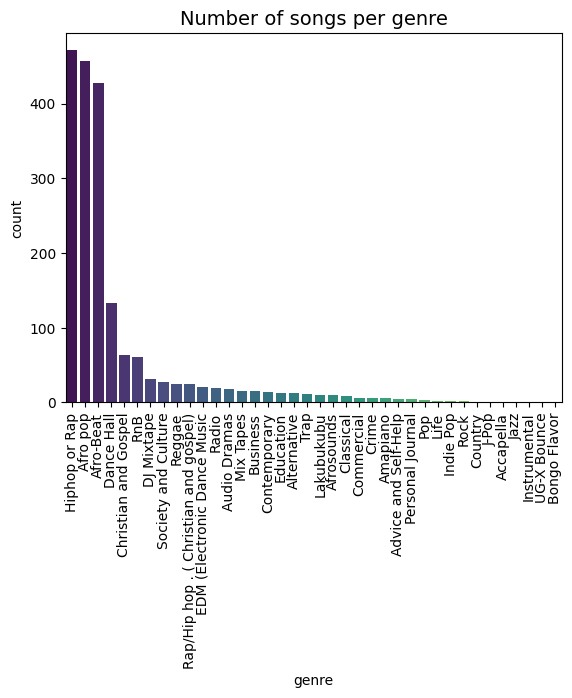

In [153]:
#lets visualize this

genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

genre_frequency_df.head()

sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False), palette='viridis')
plt.title("Number of songs per genre", fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Step 4: Data Pre-processing

creating the user item matric

In [154]:
song_frequency.head()

,userid,songid,plays
0,mw6362092bbf9b6Mk,373,1
1,mw6378a58bad504cap,582,1
2,mw6378a745a083fTri,616,1
3,mw6378bda37af59van,637,6
4,mw63c8f9c0461aaals,751,1


In [155]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.

    Args:
        df: pandas dataframe containing 3 columns (userId, songid, plays)

    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        song_mapper: dict that maps song id's to song indices
        song_inv_mapper: dict that maps song indices to song id's
    """
    M = df['userid'].nunique()
    N = df['songid'].nunique()

    user_mapper = dict(zip(np.unique(df["userid"]), list(range(M))))
    song_mapper = dict(zip(np.unique(df["songid"]), list(range(N))))

    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userid"])))
    song_inv_mapper = dict(zip(list(range(N)), np.unique(df["songid"])))

    user_index = [user_mapper[i] for i in df['userid']]
    item_index = [song_mapper[i] for i in df['songid']]

    X = csr_matrix((df["plays"], (user_index,item_index)), shape=(M,N))

    return X, user_mapper, song_mapper, user_inv_mapper, song_inv_mapper

X, user_mapper, song_mapper, user_inv_mapper, song_inv_mapper = create_X(song_frequency)

In [156]:
X.shape

(2318, 1710)

In [157]:
#user_mapper

Evaluating sparsity

Here, we calculate sparsity by dividing the number of stored elements by total number of elements. the number of stored(non-empty) elements in our matrix is equivalent to the number of ratings in our dataset.

In [158]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total

print(f"number of ratings: {n_ratings} out of {n_total} possible")
print(f"sparsity: {round(sparsity*100,2)}%")

# 0.1 and above sparcity is good
#if sparcity is anything lower that 0.1, consider to using content based filtering

number of ratings: 16240 out of 3963780 possible
sparsity: 0.41%


csr_matrix.nnz counts the stored values in our sparse matrix. the rest of our cells are emtpy.

The cold start problem is when there are new users and songs in our matrix that do not have any ratings. in our songs dataset, all users and songs have atleast one play but in general, its useful to check which users and songs have few interactions

In [159]:
n_plays_per_user = X.getnnz(axis=1)
len(n_plays_per_user)

2318

In [160]:
print(f"Most active user played {n_plays_per_user.max()} songs.")
print(f"Least active user played {n_plays_per_user.min()} songs.")

Most active user played 690 songs.
Least active user played 1 songs.


In [161]:
n_plays_per_song = X.getnnz(axis=0)
len(n_plays_per_song)

1710

In [162]:
print(f"most played song has {n_plays_per_song.max()} plays.")
print(f"least played song has {n_plays_per_song.min()} plays.")

most played song has 294 plays.
least played song has 1 plays.


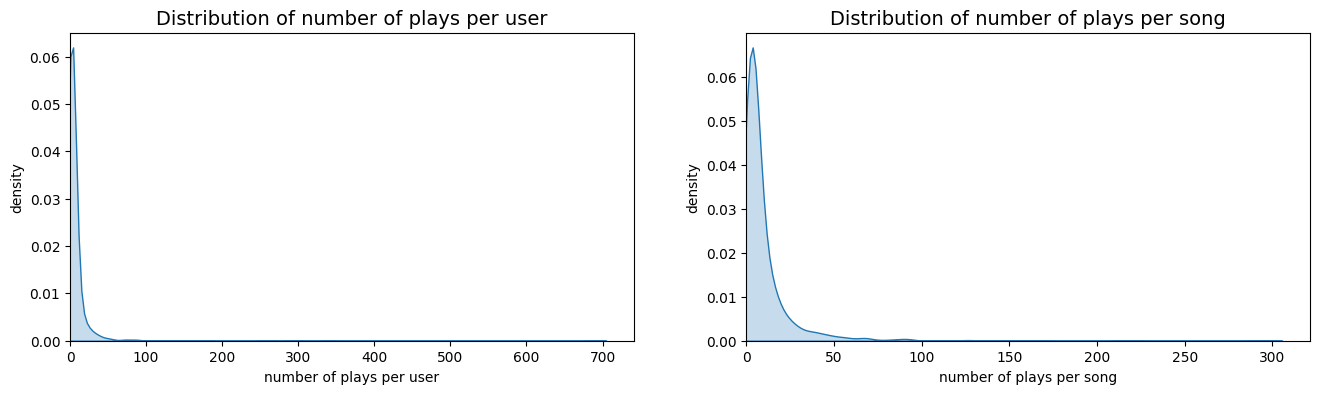

In [163]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_plays_per_user, shade=True)
plt.xlim(0)
plt.title("Distribution of number of plays per user", fontsize=14)
plt.xlabel("number of plays per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_plays_per_song, shade=True)
plt.xlim(0)
plt.title("Distribution of number of plays per song", fontsize=14)
plt.xlabel("number of plays per song")
plt.ylabel("density")
plt.show()

**step 5 Item-Item Recommendations with k-nearest neighbors**

In [164]:
# we are going to find the k songs that have the most similar user engagement vectors for song i.

In [165]:
from sklearn.neighbors import NearestNeighbors

def find_similar_songs(song_id, X, song_mapper, song_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given song id.

    Args:
        song_id: id of the song of interest
        X: user-item utility matrix
        k: number of similar songs to retrieve
        metric: distance metric for kNN calculations

    Output: returns list of k similar song ID's
    """
    X = X.T
    neighbour_ids = []

    song_ind = song_mapper[song_id]
    song_vec = X[song_ind]
    if isinstance(song_vec, (np.ndarray)):
        song_vec = song_vec.reshape(1,-1)
    # use k+1 since kNN output includes the songId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(song_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(song_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [166]:
similar_songs = find_similar_songs(1787, X, song_mapper, song_inv_mapper, k=10)
similar_songs

[np.int64(973),
 np.int64(1831),
 np.int64(1923),
 np.int64(1772),
 np.int64(1354),
 np.int64(174),
 np.int64(1368),
 np.int64(923),
 np.int64(481)]

In [167]:
song_titles = dict(zip(song_details['songid'], song_details['title']))

cosine metric

In [168]:
song_id = 481
similar_songs = find_similar_songs(song_id, X, song_mapper, song_inv_mapper, metric='cosine', k=10)
song_title = song_titles[song_id]

print(f"Because you watched {song_title}:")
for i in similar_songs:
  print(song_titles[i])

Because you watched Fly:
Imitongo
Fly
Am not the only one 
256ickin
No Pressure
Spaceship Goddess Theory
Watye e Yoo
Star Gyal
BUSITQUENCYmaster


euclidean metric

In [169]:
song_id = 481
similar_songs = find_similar_songs(song_id, X, song_mapper, song_inv_mapper, metric='euclidean', k=10)
song_title = song_titles[song_id]

print(f"Because you watched {song_title}:")
for i in similar_songs:
  print(song_titles[i])

Because you watched Fly:
BUSITQUENCYmaster
MUKAMA NYONGERA SENTE
No Pressure
256ickin
LEGA
I am the one
Star Gyal
Spaceship Goddess Theory
Imitongo


#Step 6 : Handling the cold-start problem

Collaborative filtering relies solely on user-item interactions within the utility matrix. The issue with this approach is that brand new users or items with no iteractions get excluded from the recommendation system. This is called the cold start problem. Content-based filtering is a way to handle this problem by generating recommendations based on user and item features.

First, we need to convert the genres column into binary features. Each genre will have its own column in the dataframe, and will be populated with 0 or 1.

In [170]:
n_songs = song_details['songid'].nunique()
print(f"There are {n_songs} unique songs in our songs dataset.")

There are 1936 unique songs in our songs dataset.


In [171]:
#change genre colum to list
song_details['genre'] = song_details['genre'].apply(lambda x: [x])  # wrap in list

genres = set(g for G in  song_details['genre'] for g in G)

for g in genres:
    song_details[g] = song_details.genre.transform(lambda x: int(g in x))

song_genres = song_details.drop(columns=['songid', 'title','genre'])

In [172]:
song_genres

,Business,Rock,Trap,Reggae,Accapella,Education,Bongo Flavor,Personal Journal,Jazz,Advice and Self-Help,...,J-Pop,Pop,Contemporary,Society and Culture,Instrumental,Christian and Gospel,Commercial,Indie Pop,Alternative,Hiphop or Rap
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [173]:
song_genres.head()

,Business,Rock,Trap,Reggae,Accapella,Education,Bongo Flavor,Personal Journal,Jazz,Advice and Self-Help,...,J-Pop,Pop,Contemporary,Society and Culture,Instrumental,Christian and Gospel,Commercial,Indie Pop,Alternative,Hiphop or Rap
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(song_genres, song_genres)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (1936, 1936)


In [175]:
cosine_sim[1]

array([1., 1., 1., ..., 0., 0., 0.])

#Creating a song finder function

using python fuzzyword to find the most similar title to a string that you pass in

In [176]:
!pip install fuzzywuzzy

In [177]:
from fuzzywuzzy import process

def song_finder(title):
    all_titles = song_details['title'].tolist()
    closest_match = process.extractOne(title, all_titles)
    return closest_match[0]

In [178]:
title = song_finder('karamoja')
title

'Karimojong Lady'

In [179]:
song_idx = dict(zip(song_details['title'], list(song_details.index)))
idx = song_idx[title]
print(f"song index for {title} is {idx}")

song index for Karimojong Lady is 178


In [180]:
n_recommendations=10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
sim_scores

[(59, np.float64(1.0)),
 (61, np.float64(1.0)),
 (100, np.float64(1.0)),
 (101, np.float64(1.0)),
 (102, np.float64(1.0)),
 (103, np.float64(1.0)),
 (104, np.float64(1.0)),
 (105, np.float64(1.0)),
 (106, np.float64(1.0)),
 (118, np.float64(1.0))]

In [181]:
song_indices = [i[0] for i in sim_scores]
print(f"Because you watched {title}:")
song_details[['title','songid']].iloc[song_indices]

Because you watched Karimojong Lady:


,title,songid
59,Loving Feat Twisky Fingers,138
61,Madamse,140
100,Wangmuye,185
101,Nonstop,186
102,Yata,187
103,Itye-ikwona,188
104,Nyuk Nyuk,189
105,Give it to me,190
106,Kakwangala,191
118,Pe Obed Me Yweka Ni,205


we can test our recommender further with other songs tiles, for convinience, lets package the steps into a single function which takes in song title of interest and number of recommendations

In [182]:
def get_content_based_recommendations(title_string, n_recommendations=10):
    title = song_finder(title_string)
    idx = song_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_songs = [i[0] for i in sim_scores]
    print(f"Because you watched {title}:")
    print(song_details[['title','songid']].iloc[similar_songs])

In [183]:
get_content_based_recommendations('A Prayer To The Gods',5)

Because you watched A Prayer To The Gods:
         title  songid
19   Min Obuje      93
20  Lak Matar       94
21   Lak Matar      95
22    Imitongo      96
23     Ikareni      97


#step 7: Dimensionality Reduction with matrix factorization (advanced)

Matrix factorization (MF) is a linear algebra technique that can help us discover latent features underlying the interactions between users and songs. These latent features give a more compact representation of user tastes and item descriptions. MF is particularly useful for very sparse data and can enhance the quality of recommendations. The algorithm works by factorizing the original user-item matrix into two factor matrices:

user-factor matrix (n_users, k)
item-factor matrix (k, n_items)
We are reducing the dimensions of our original matrix into "taste" dimensions. We cannot interpret what each latent feature  k  represents. However, we could imagine that one latent feature may represent users who like romantic comedies from the 1990s, while another latent feature may represent songs which are independent foreign language films.



In [184]:
from sklearn.decomposition import TruncatedSVD
# n-songs by n-components
svd = TruncatedSVD(n_components= 20 , n_iter= 10)
Q = svd.fit_transform(X.T)
Q.shape

(1710, 20)

In [185]:
X.shape

(2318, 1710)

In [186]:
song_id = 1053
similar_songs = find_similar_songs(song_id, Q.T, song_mapper, song_inv_mapper, metric='cosine', k=10)
song_title = song_titles[song_id]

print(f"Because you watched {song_title}:")
for i in similar_songs:
    print(song_titles[i])

Because you watched A Prayer To The Gods:
Weekend
Sweet gangsta
16
NKOKOLIMA
 Drillz The Rapper - You Want[Remix] feat. King Ten
Calling
Amnesia (feat. Cmert Keyz & Tamie Moze)
Blessed Curse
Muniga


#evaluation
--precision
--recall